<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/Marketing_Performance_with_KPIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 0. Data

Source: https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data?resource=download

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/_Python/Machine-Learning-and-Generative-AI-for-Marketing/ch.2/data.csv")

In [5]:
sorted(df.columns)

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [6]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [7]:
df.tail().T

,9129,9130,9131,9132,9133
Customer,LA72316,PK87824,TD14365,UP19263,Y167826
State,California,California,California,California,California
Customer Lifetime Value,23405.98798,3096.511217,8163.890428,7524.442436,2611.836866
Response,No,Yes,No,No,No
Coverage,Basic,Extended,Extended,Extended,Extended
Education,Bachelor,College,Bachelor,College,College
Effective To Date,2/10/11,2/12/11,2/6/11,2/3/11,2/14/11
EmploymentStatus,Employed,Employed,Unemployed,Employed,Unemployed
Gender,M,F,M,M,M
Income,71941,21604,0,21941,0


# 1. Conversion Rate

1. **Cost per Lead**: Keeping track of the rise and fall of CPL is important for successful marketing campaigns during this stage, as rising CPL indicates that the efficiency of your marketing strategy is decreasing.
 - Cost per Lead (CPL) = Total Cost of Marketing / Number of Leads
2. **Conversion Rate**: Tracking the rise and fall of the conversion rate is important, as a falling conversion rate may suggest inefficiency in marketing strategies at this stage, product feature deficiencies, or market shifts in interests.
 - Conversion Rate = Number of Conversions / Number og Leads
3. **Retention**: Rising CRR suggests that customers see value in using our services and products continuously; on the other hand, an increase in CCR suggests the opposite.
 - Customer Retention Rate (CRR) = (# of Customers at the End of Period - # of New Customers during the Period) / # of Customers at the Start of Period
 - Customer Churn Rate (CCR) = # of Customers lost during the Period / # of Customers at the Start of Period

In [8]:
df["conversion"] = df["Response"].apply(lambda x: 1 if x == "Yes" else 0)

## 1.1. Overall Conversion Rate

In [9]:
df["conversion"].mean()

np.float64(0.14320122618786948)

Text(0, 0.5, '')

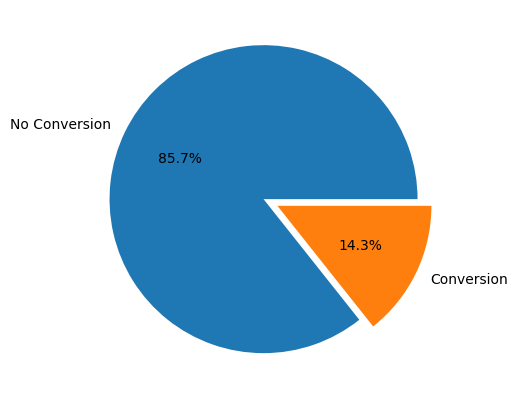

In [10]:
ax = df.groupby("conversion")["Customer"].count().reset_index().plot.pie(
    figsize=(5, 5),
    y="Customer",
    autopct='%1.1f%%',
    legend=False,
    labels=["No Conversion", "Conversion"],
    explode=[0.05, 0.05]
)
ax.set_ylabel(None)

## 1.2. Demographics and Conversion Rate

In [11]:
(df["Income"] == 0).sum(), df.shape[0]

(np.int64(2317), 9134)

<Axes: >

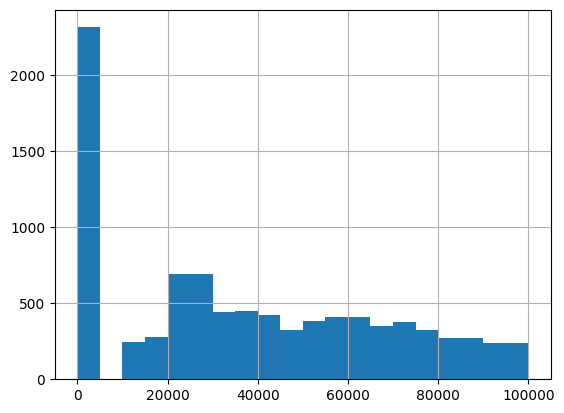

In [12]:
df["Income"].hist(bins=20)

In [13]:
df["income_category"] = df["Income"].apply(
    lambda x: 0 if x == 0 else x//10000
)

Text(0.5, 1.0, 'Conversion Rate across Reported Income')

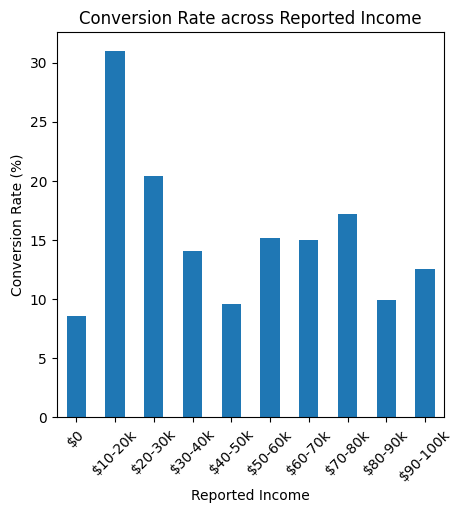

In [14]:
income_conversion = df.groupby("income_category")["conversion"].mean() * 100
ax = (
    income_conversion
).plot.bar(
    figsize=(5, 5),
    rot=45,
)
ax.set_xticklabels(["$0" if x == 0 else f"${x}0-{x+1}0k" for x in income_conversion.index])
ax.set_ylabel("Conversion Rate (%)")
ax.set_xlabel("Reported Income")
ax.set_title("Conversion Rate across Reported Income")

## 1.3. Sales Channel and Conversion Rate

Text(0.5, 1.0, 'Conversion Rate per Sales Channel')

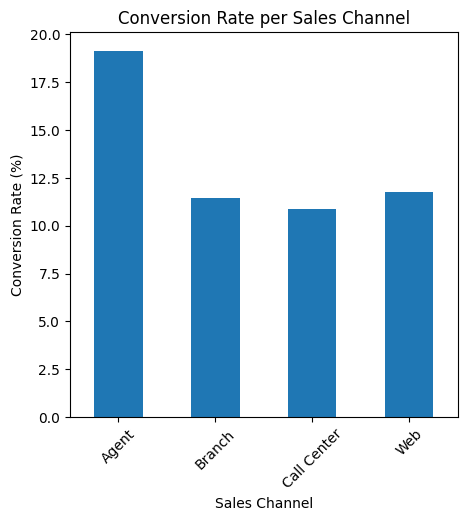

In [15]:
ax = (df.groupby("Sales Channel")["conversion"].mean() * 100).plot.bar(figsize=(5, 5), rot=45)
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("Conversion Rate per Sales Channel")

Text(0, 0.5, '')

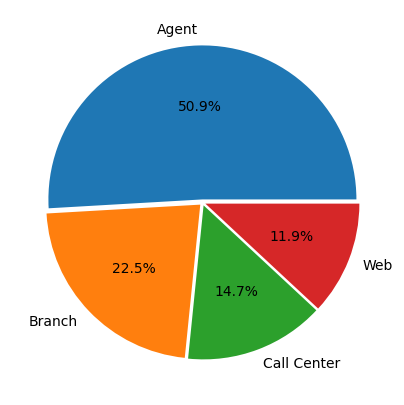

In [16]:
sales_channel_count = df.groupby("Sales Channel")["conversion"].sum()
ax = sales_channel_count.reset_index().plot.pie(
    figsize=(5, 5),
    y="conversion",
    autopct='%1.1f%%',
    legend=False,
    labels=sales_channel_count.index,
    explode=[0.02]*df["Sales Channel"].nunique()
)
ax.set_ylabel(None)

## 1.4. Promotions and Conversion Rate

In [17]:
df.groupby("Renew Offer Type")["conversion"].count()

,conversion
Renew Offer Type,
Offer1,3752
Offer2,2926
Offer3,1432
Offer4,1024


Text(0.5, 1.0, 'Conversion Rate per Promotion (Offer Type)')

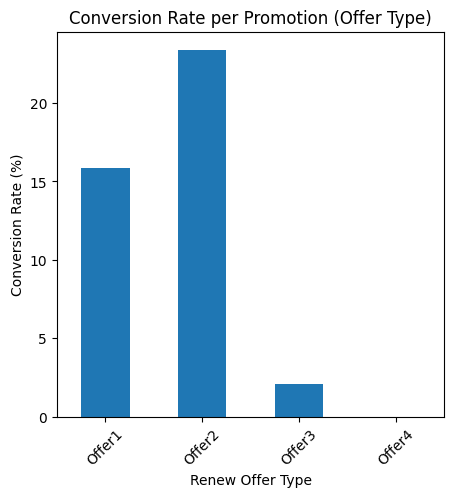

In [18]:
ax = (
    df.groupby("Renew Offer Type")["conversion"].mean() * 100
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("Conversion Rate per Promotion (Offer Type)")

Text(0, 0.5, '')

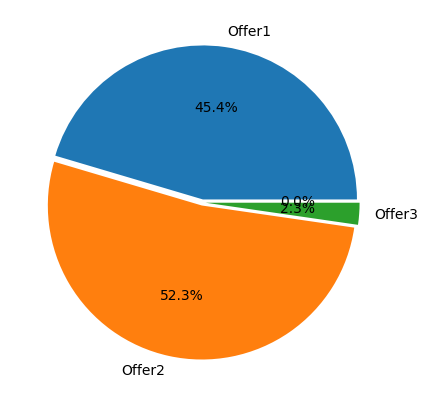

In [19]:
offer_count = df.groupby("Renew Offer Type")["conversion"].sum()
ax = offer_count.reset_index().plot.pie(
    figsize=(5, 5),
    y="conversion",
    autopct='%1.1f%%',
    legend=False,
    labels=offer_count.index,
    explode=[0.02]*offer_count.shape[0]
)
ax.set_ylabel(None)

# 2. Customer Lifetime Value (CLV)

## 2.1. Overall CLV

In [20]:
df["Customer Lifetime Value"].describe()

,Customer Lifetime Value
count,9134.000000
mean,8004.940475
std,6870.967608
min,1898.007675
25%,3994.251794
50%,5780.182197
75%,8962.167041
max,83325.381190


<Axes: >

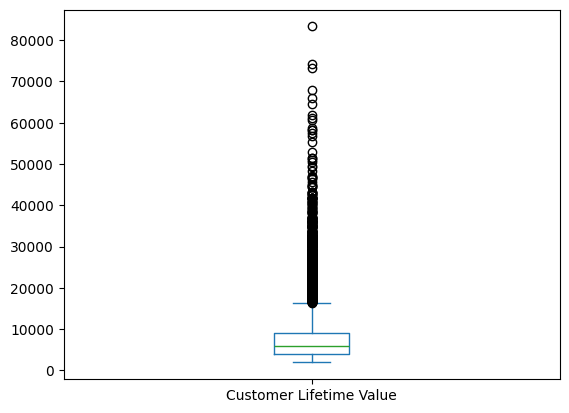

In [21]:
df["Customer Lifetime Value"].plot.box()

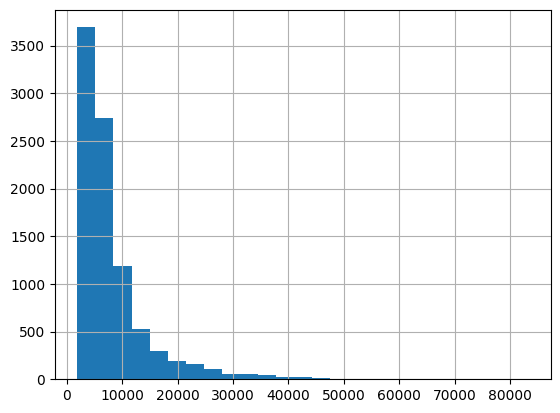

In [22]:
ax = df["Customer Lifetime Value"].hist(bins=25)
plt.show()

## 2.2. Geolocation and CLV

Text(0.5, 1.0, 'CLV per State')

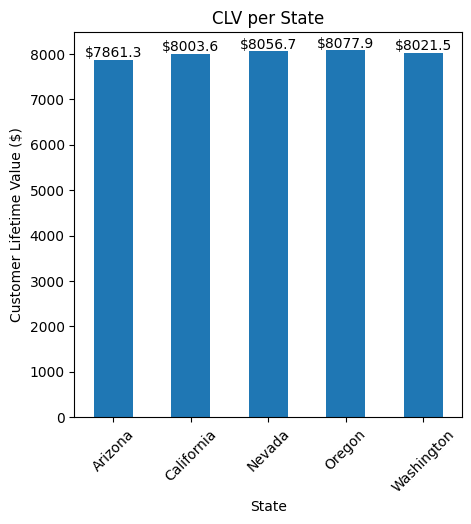

In [23]:
ax = df.groupby("State")["Customer Lifetime Value"].mean().plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per State")

In [24]:
df["Location Code"].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

Text(0.5, 1.0, 'CLV per State')

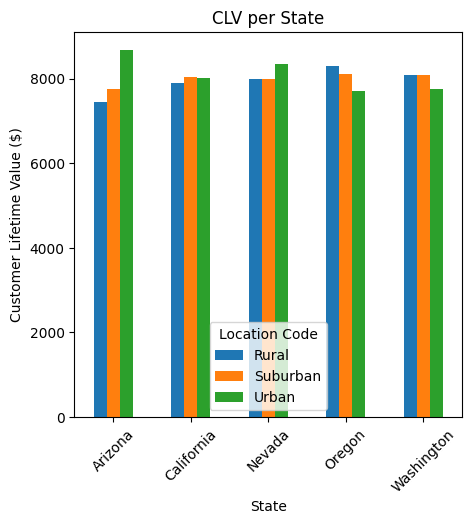

In [25]:
ax = df.groupby([
    "State", "Location Code"
])[
    "Customer Lifetime Value"
].mean().unstack().plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per State")

## 2.3. Product and CLV

Text(0.5, 1.0, 'CLV per Product')

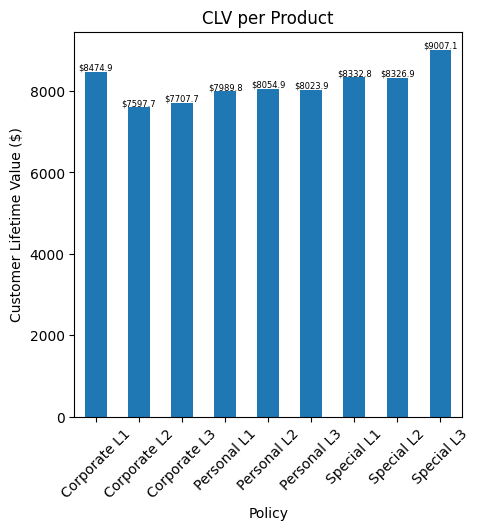

In [26]:
ax = df.groupby("Policy")["Customer Lifetime Value"].mean().plot.bar(
    figsize=(5, 5),rot=45)
ax.bar_label(ax.containers[0], fmt='$%.1f', fontsize=6)
ax.set_ylabel("Customer Lifetime Value ($)")
ax.set_title("CLV per Product")

# 3. Cost per Acquisition (CPA)

In [27]:
cost_distr = {
    "Agent": {"avg": 200, "std": 40},
    "Branch": {"avg": 85, "std": 17},
    "Call Center": {"avg": 30, "std": 6},
    "Web": {"avg": 2, "std": 0.5}
}

In [28]:
df["est_acquisition_cost"] = df["Sales Channel"].apply(
    lambda x: np.random.normal(cost_distr[x]["avg"], cost_distr[x]["std"], 1)[0]
)

In [29]:
df["est_acquisition_cost"].describe()

,est_acquisition_cost
count,9134.000000
mean,105.824631
std,82.510247
min,0.552996
25%,30.490350
50%,88.393419
75%,182.537216
max,360.471303


## 3.1. Overall CPA

In [30]:
campaign_cost = df["est_acquisition_cost"].sum() / df["conversion"].sum()
print(f"${campaign_cost:.1f}")

$739.0


Text(0.5, 1.0, 'Total Cost Spent')

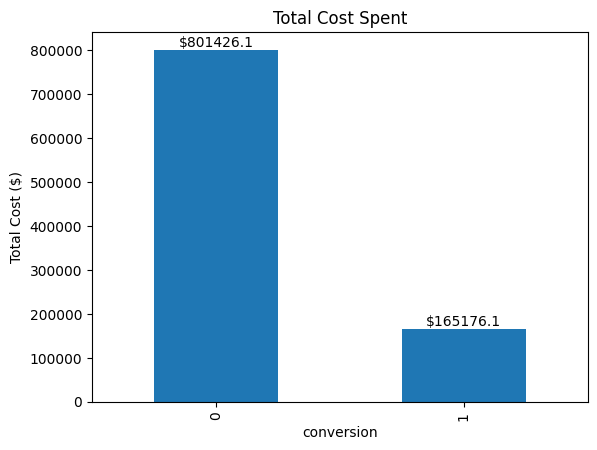

In [31]:
ax = df.groupby("conversion")["est_acquisition_cost"].sum().plot.bar()
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Total Cost ($)")
ax.set_title("Total Cost Spent")

## 3.2. Sales Channel and CPA

In [32]:
channel_cpa = df.groupby("Sales Channel")["est_acquisition_cost"].sum() / df.groupby("Sales Channel")["conversion"].sum()

Text(0.5, 1.0, 'CPA per Sales Channel')

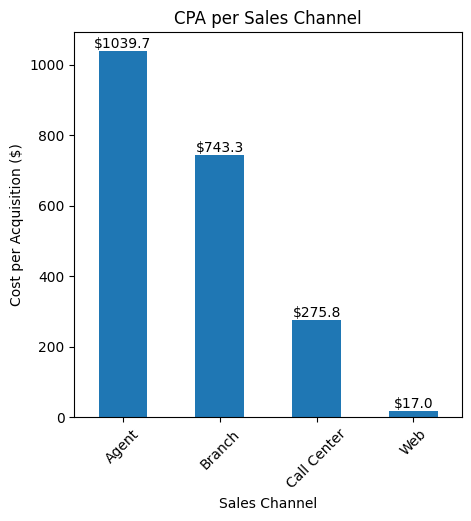

In [33]:
ax = (
    channel_cpa
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Cost per Acquisition ($)")
ax.set_title("CPA per Sales Channel")

## 3.3. Promotions and CPA

In [34]:
promo_cpa = (
    df.groupby("Renew Offer Type")["est_acquisition_cost"].sum()
    /
    df.groupby("Renew Offer Type")["conversion"].sum()
)

In [35]:
df.groupby("Renew Offer Type")["conversion"].mean()

,conversion
Renew Offer Type,
Offer1,0.158316
Offer2,0.233766
Offer3,0.020950
Offer4,0.000000


Text(0.5, 1.0, 'Total Cost per Promotion')

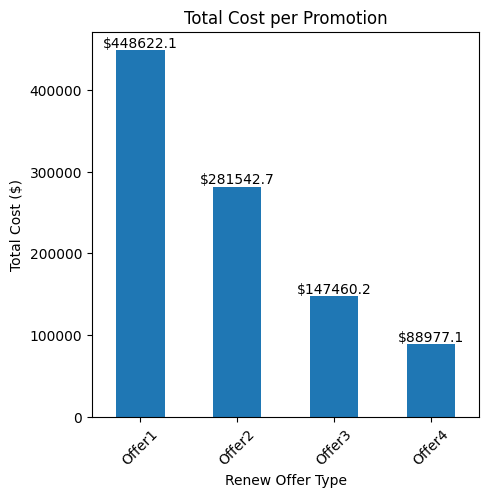

In [36]:
ax = df.groupby("Renew Offer Type")["est_acquisition_cost"].sum().plot.bar(
    figsize=(5,5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Total Cost ($)")
ax.set_title("Total Cost per Promotion")

Text(0.5, 1.0, 'CPA per Promotion')

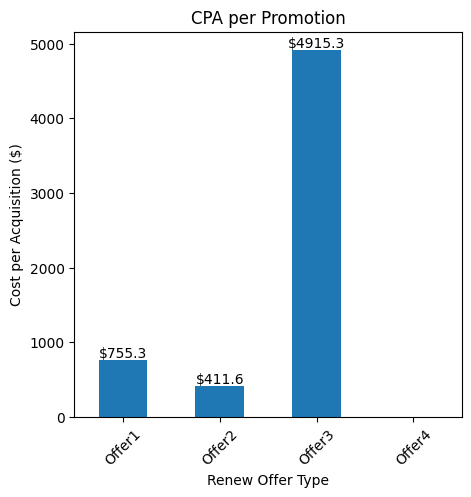

In [37]:
ax = (
    promo_cpa
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='$%.1f')
ax.set_ylabel("Cost per Acquisition ($)")
ax.set_title("CPA per Promotion")

# 4. Return on Investment (ROI)

## 4.1. Overall ROI

In [38]:
campaign_cost = df["est_acquisition_cost"].sum()
converted_clv = (df["Customer Lifetime Value"] * df["conversion"]).sum()
print(f"Total CLV: ${converted_clv:,.02f}")
print(f"Total Cost: ${campaign_cost:,.02f}")
print(f"Overall ROI: {(converted_clv-campaign_cost)/campaign_cost:.01f}x")

Total CLV: $10,274,171.74
Total Cost: $966,602.18
Overall ROI: 9.6x


In [40]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Waterfall(
        name = "Waterfall",
        orientation = "v",
        measure = ["relative", "relative", "total"],
        x = ["Total CLV", "Total Marketing Cost", "Net Return"],
        textposition = "outside",
        text = [
            f"${converted_clv:.01f}",
            f"${campaign_cost:.01f}",
            f"Return: ${converted_clv-campaign_cost:.1f} ({(converted_clv-campaign_cost)/campaign_cost:.01f}x)"
        ],
        y = [converted_clv, -campaign_cost, 0],
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    )
)

fig.update_layout(
    height=600,
    width=600,
    title = "ROI",
    showlegend = True
)

fig.show()


## 4.2. ROI per Sales Channel

In [41]:
df["return"] = (df["Customer Lifetime Value"]*df["conversion"]) - df["est_acquisition_cost"]

In [42]:
channel_roi = df.groupby("Sales Channel")["return"].sum() / df.groupby("Sales Channel")["est_acquisition_cost"].sum()

In [43]:
channel_roi

,0
Sales Channel,
Agent,6.345982
Branch,10.096319
Call Center,28.043706
Web,461.119384


Text(0.5, 1.0, 'ROI per Sales Channel')

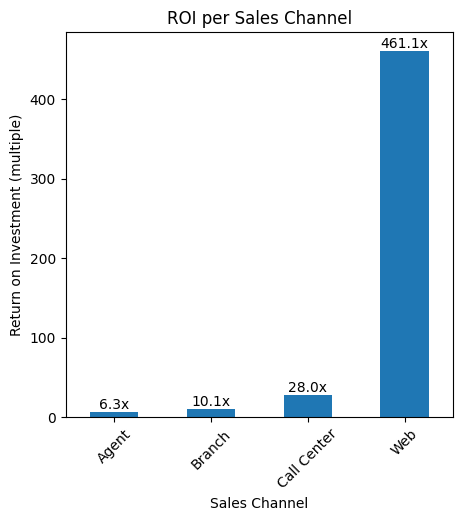

In [44]:
ax = (
    channel_roi
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.bar_label(ax.containers[0], fmt='%.1fx')
ax.set_ylabel("Return on Investment (multiple)")
ax.set_title("ROI per Sales Channel")

## 4.3. ROI per Promotions

In [45]:
df["return"] = (df["Customer Lifetime Value"]*df["conversion"]) - df["est_acquisition_cost"]

In [46]:
promo_roi = (
    df.groupby("Renew Offer Type")["return"].sum()
    /
    df.groupby("Renew Offer Type")["est_acquisition_cost"].sum()
)

In [47]:
promo_roi

,0
Renew Offer Type,
Offer1,10.786847
Offer2,15.953554
Offer3,0.445692
Offer4,-1.000000


Text(0.5, 1.0, 'ROI per Promotion')

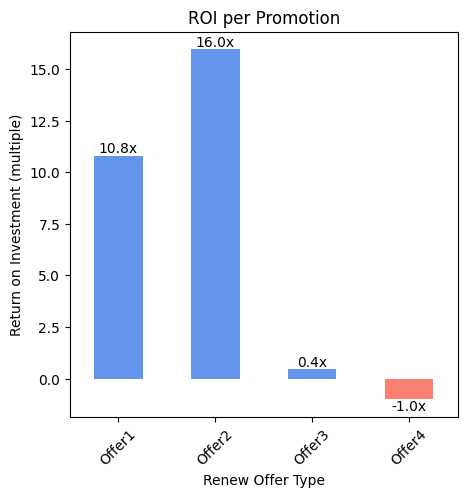

In [48]:
ax = (
    promo_roi
).plot.bar(
    figsize=(5, 5),
    rot=45,
    color=(promo_roi > 0).map({True: 'cornflowerblue', False: 'salmon'})
)
ax.bar_label(ax.containers[0], fmt='%.1fx')
ax.set_ylabel("Return on Investment (multiple)")
ax.set_title("ROI per Promotion")

# 5. Correlations

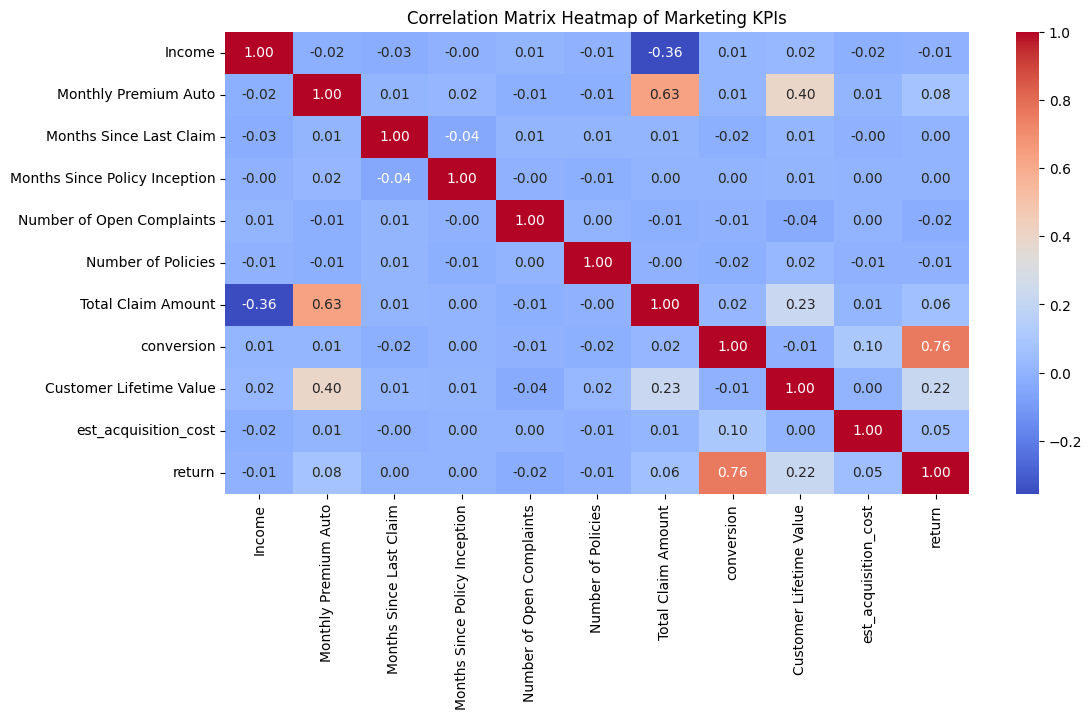

In [50]:
import seaborn as sns

correlation_matrix = df[[
    'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
    'conversion', 'Customer Lifetime Value', 'est_acquisition_cost', 'return'
]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap of Marketing KPIs')
plt.show()
